![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [224]:
import warnings
warnings.filterwarnings('ignore')

In [225]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.models import load_model

In [226]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


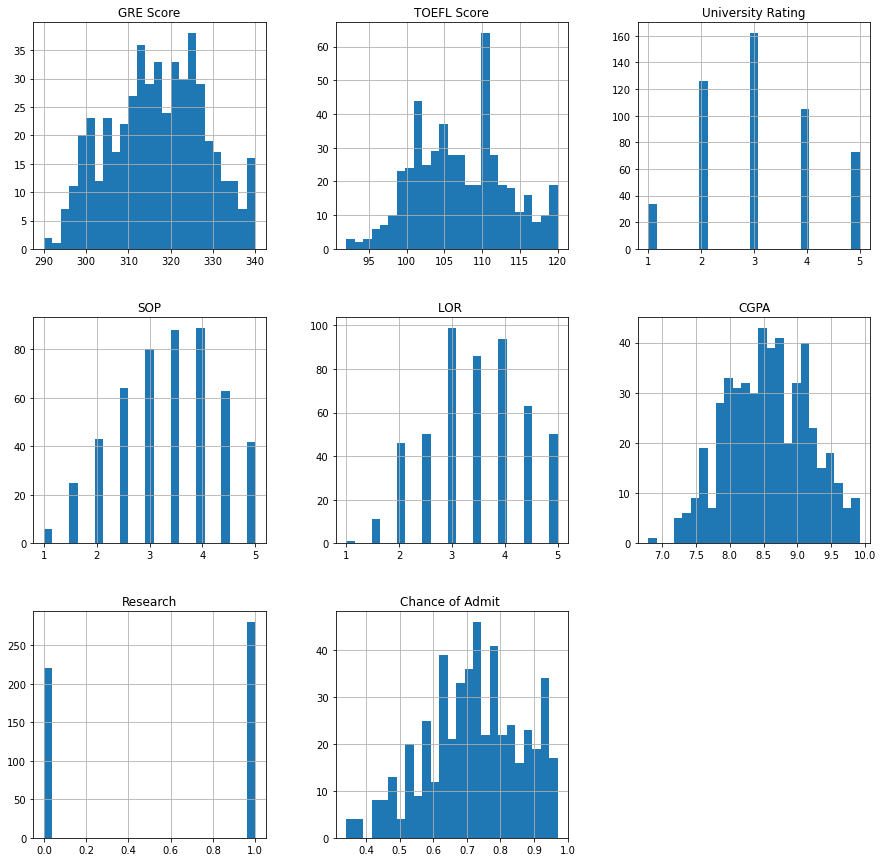

In [227]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [228]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [229]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [230]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)


In [231]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

1  output variables


In [232]:
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [233]:
import tensorflow as tf
from tensorflow import keras

In [234]:
EPOCHS = 100
optimizers_list = [
    tf.keras.optimizers.Adadelta(),
    tf.keras.optimizers.Adagrad(),
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adamax(),
    tf.keras.optimizers.Ftrl(),
    tf.keras.optimizers.Nadam(),
    tf.keras.optimizers.RMSprop(), 
    tf.keras.optimizers.SGD()
]

In [235]:
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,))])
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

Epoch 1/100
9/9 [==============================] - 1s 50ms/step - loss: 0.3767 - mae: 0.5683 - val_loss: 0.4000 - val_mae: 0.5866
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 0.3767 - mae: 0.5683 - val_loss: 0.4000 - val_mae: 0.5866
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3767 - mae: 0.5683 - val_loss: 0.3999 - val_mae: 0.5866
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3767 - mae: 0.5683 - val_loss: 0.3999 - val_mae: 0.5865
Epoch 5/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3767 - mae: 0.5683 - val_loss: 0.3999 - val_mae: 0.5865
Epoch 6/100
9/9 [==============================] - 0s 17ms/step - loss: 0.3767 - mae: 0.5683 - val_loss: 0.3999 - val_mae: 0.5865
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3766 - mae: 0.5682 - val_loss: 0.3999 - val_mae: 0.5865
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3766 - mae: 0.56

9/9 [==============================] - 0s 15ms/step - loss: 0.3757 - mae: 0.5673 - val_loss: 0.3989 - val_mae: 0.5854
Epoch 64/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3757 - mae: 0.5673 - val_loss: 0.3989 - val_mae: 0.5854
Epoch 65/100
9/9 [==============================] - 0s 17ms/step - loss: 0.3757 - mae: 0.5672 - val_loss: 0.3989 - val_mae: 0.5854
Epoch 66/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3757 - mae: 0.5672 - val_loss: 0.3989 - val_mae: 0.5854
Epoch 67/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3756 - mae: 0.5672 - val_loss: 0.3988 - val_mae: 0.5854
Epoch 68/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3756 - mae: 0.5672 - val_loss: 0.3988 - val_mae: 0.5853
Epoch 69/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3756 - mae: 0.5672 - val_loss: 0.3988 - val_mae: 0.5853
Epoch 70/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3756 - mae: 0.5671 - 

Epoch 26/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3794 - mae: 0.5676 - val_loss: 0.4055 - val_mae: 0.5884
Epoch 27/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3792 - mae: 0.5675 - val_loss: 0.4053 - val_mae: 0.5883
Epoch 28/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3791 - mae: 0.5674 - val_loss: 0.4052 - val_mae: 0.5881
Epoch 29/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3789 - mae: 0.5672 - val_loss: 0.4050 - val_mae: 0.5880
Epoch 30/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3788 - mae: 0.5671 - val_loss: 0.4049 - val_mae: 0.5878
Epoch 31/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3786 - mae: 0.5669 - val_loss: 0.4047 - val_mae: 0.5877
Epoch 32/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3785 - mae: 0.5668 - val_loss: 0.4045 - val_mae: 0.5875
Epoch 33/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3784 - m

Epoch 89/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3710 - mae: 0.5593 - val_loss: 0.3963 - val_mae: 0.5796
Epoch 90/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3709 - mae: 0.5592 - val_loss: 0.3962 - val_mae: 0.5794
Epoch 91/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3707 - mae: 0.5591 - val_loss: 0.3961 - val_mae: 0.5793
Epoch 92/100
9/9 [==============================] - 0s 25ms/step - loss: 0.3706 - mae: 0.5589 - val_loss: 0.3959 - val_mae: 0.5792
Epoch 93/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3705 - mae: 0.5588 - val_loss: 0.3958 - val_mae: 0.5790
Epoch 94/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3704 - mae: 0.5587 - val_loss: 0.3957 - val_mae: 0.5789
Epoch 95/100
9/9 [==============================] - 0s 30ms/step - loss: 0.3702 - mae: 0.5586 - val_loss: 0.3955 - val_mae: 0.5788
Epoch 96/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3701 - mae

Epoch 52/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1072 - mae: 0.2674 - val_loss: 0.1144 - val_mae: 0.2754
Epoch 53/100
9/9 [==============================] - 0s 11ms/step - loss: 0.1020 - mae: 0.2604 - val_loss: 0.1092 - val_mae: 0.2686
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0968 - mae: 0.2527 - val_loss: 0.1042 - val_mae: 0.2612
Epoch 55/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0921 - mae: 0.2454 - val_loss: 0.0994 - val_mae: 0.2542
Epoch 56/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0874 - mae: 0.2378 - val_loss: 0.0947 - val_mae: 0.2468
Epoch 57/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0830 - mae: 0.2303 - val_loss: 0.0901 - val_mae: 0.2389
Epoch 58/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0788 - mae: 0.2231 - val_loss: 0.0857 - val_mae: 0.2318
Epoch 59/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0748 - mae: 0.

Epoch 15/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3220 - mae: 0.5064 - val_loss: 0.3461 - val_mae: 0.5249
Epoch 16/100
9/9 [==============================] - 0s 16ms/step - loss: 0.3193 - mae: 0.5033 - val_loss: 0.3437 - val_mae: 0.5221
Epoch 17/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3168 - mae: 0.5004 - val_loss: 0.3413 - val_mae: 0.5195
Epoch 18/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3144 - mae: 0.4977 - val_loss: 0.3390 - val_mae: 0.5170
Epoch 19/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3121 - mae: 0.4951 - val_loss: 0.3367 - val_mae: 0.5146
Epoch 20/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3098 - mae: 0.4926 - val_loss: 0.3345 - val_mae: 0.5123
Epoch 21/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3077 - mae: 0.4902 - val_loss: 0.3323 - val_mae: 0.5101
Epoch 22/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3055 - mae:

9/9 [==============================] - 0s 9ms/step - loss: 0.1401 - mae: 0.3121 - val_loss: 0.1487 - val_mae: 0.3203
Epoch 78/100
9/9 [==============================] - 0s 53ms/step - loss: 0.1368 - mae: 0.3079 - val_loss: 0.1451 - val_mae: 0.3160
Epoch 79/100
9/9 [==============================] - 0s 23ms/step - loss: 0.1336 - mae: 0.3036 - val_loss: 0.1416 - val_mae: 0.3115
Epoch 80/100
9/9 [==============================] - 0s 26ms/step - loss: 0.1303 - mae: 0.2992 - val_loss: 0.1381 - val_mae: 0.3071
Epoch 81/100
9/9 [==============================] - 0s 21ms/step - loss: 0.1271 - mae: 0.2949 - val_loss: 0.1347 - val_mae: 0.3027
Epoch 82/100
9/9 [==============================] - 0s 47ms/step - loss: 0.1239 - mae: 0.2906 - val_loss: 0.1314 - val_mae: 0.2983
Epoch 83/100
9/9 [==============================] - 0s 25ms/step - loss: 0.1208 - mae: 0.2863 - val_loss: 0.1281 - val_mae: 0.2939
Epoch 84/100
9/9 [==============================] - 0s 14ms/step - loss: 0.1177 - mae: 0.2819 - v

Epoch 40/100
9/9 [==============================] - 0s 26ms/step - loss: 0.5000 - mae: 0.6949 - val_loss: 0.5361 - val_mae: 0.7215
Epoch 41/100
9/9 [==============================] - 0s 17ms/step - loss: 0.4992 - mae: 0.6943 - val_loss: 0.5352 - val_mae: 0.7208
Epoch 42/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4983 - mae: 0.6937 - val_loss: 0.5343 - val_mae: 0.7202
Epoch 43/100
9/9 [==============================] - 0s 19ms/step - loss: 0.4975 - mae: 0.6932 - val_loss: 0.5334 - val_mae: 0.7196
Epoch 44/100
9/9 [==============================] - 0s 16ms/step - loss: 0.4967 - mae: 0.6926 - val_loss: 0.5325 - val_mae: 0.7190
Epoch 45/100
9/9 [==============================] - 0s 17ms/step - loss: 0.4959 - mae: 0.6920 - val_loss: 0.5316 - val_mae: 0.7184
Epoch 46/100
9/9 [==============================] - 0s 31ms/step - loss: 0.4951 - mae: 0.6914 - val_loss: 0.5307 - val_mae: 0.7178
Epoch 47/100
9/9 [==============================] - 0s 32ms/step - loss: 0.4942 - ma

9/9 [==============================] - 0s 32ms/step - loss: 0.3807 - mae: 0.5716 - val_loss: 0.4016 - val_mae: 0.5872
Epoch 3/100
9/9 [==============================] - 1s 71ms/step - loss: 0.3707 - mae: 0.5617 - val_loss: 0.3905 - val_mae: 0.5760
Epoch 4/100
9/9 [==============================] - 0s 45ms/step - loss: 0.3606 - mae: 0.5514 - val_loss: 0.3795 - val_mae: 0.5648
Epoch 5/100
9/9 [==============================] - 1s 68ms/step - loss: 0.3509 - mae: 0.5414 - val_loss: 0.3691 - val_mae: 0.5540
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3417 - mae: 0.5317 - val_loss: 0.3595 - val_mae: 0.5437
Epoch 7/100
9/9 [==============================] - 0s 27ms/step - loss: 0.3334 - mae: 0.5226 - val_loss: 0.3510 - val_mae: 0.5343
Epoch 8/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3260 - mae: 0.5144 - val_loss: 0.3436 - val_mae: 0.5258
Epoch 9/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3193 - mae: 0.5066 - val_los

Epoch 65/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0723 - mae: 0.2042 - val_loss: 0.0782 - val_mae: 0.2111
Epoch 66/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0691 - mae: 0.1982 - val_loss: 0.0749 - val_mae: 0.2052
Epoch 67/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0661 - mae: 0.1927 - val_loss: 0.0717 - val_mae: 0.1994
Epoch 68/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0632 - mae: 0.1872 - val_loss: 0.0687 - val_mae: 0.1937
Epoch 69/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0606 - mae: 0.1816 - val_loss: 0.0659 - val_mae: 0.1881
Epoch 70/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0582 - mae: 0.1765 - val_loss: 0.0633 - val_mae: 0.1828
Epoch 71/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0559 - mae: 0.1715 - val_loss: 0.0609 - val_mae: 0.1775
Epoch 72/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0538 - mae: 0.16

Epoch 28/100
9/9 [==============================] - 0s 13ms/step - loss: 0.2286 - mae: 0.4134 - val_loss: 0.2479 - val_mae: 0.4299
Epoch 29/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2216 - mae: 0.4073 - val_loss: 0.2399 - val_mae: 0.4232
Epoch 30/100
9/9 [==============================] - 0s 23ms/step - loss: 0.2148 - mae: 0.4014 - val_loss: 0.2324 - val_mae: 0.4164
Epoch 31/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2083 - mae: 0.3953 - val_loss: 0.2248 - val_mae: 0.4093
Epoch 32/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2021 - mae: 0.3893 - val_loss: 0.2181 - val_mae: 0.4024
Epoch 33/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1964 - mae: 0.3833 - val_loss: 0.2118 - val_mae: 0.3955
Epoch 34/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1912 - mae: 0.3773 - val_loss: 0.2059 - val_mae: 0.3886
Epoch 35/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1862 - mae: 0

Epoch 91/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0097 - mae: 0.0542 - val_loss: 0.0095 - val_mae: 0.0527
Epoch 92/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0096 - mae: 0.0539 - val_loss: 0.0095 - val_mae: 0.0529
Epoch 93/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0096 - mae: 0.0538 - val_loss: 0.0094 - val_mae: 0.0510
Epoch 94/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0096 - mae: 0.0538 - val_loss: 0.0094 - val_mae: 0.0510
Epoch 95/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0095 - mae: 0.0535 - val_loss: 0.0093 - val_mae: 0.0508
Epoch 96/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0096 - mae: 0.0535 - val_loss: 0.0093 - val_mae: 0.0514
Epoch 97/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0095 - mae: 0.0533 - val_loss: 0.0093 - val_mae: 0.0508
Epoch 98/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0096 - mae: 0

Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3589 - mae: 0.5521 - val_loss: 0.3808 - val_mae: 0.5687
Epoch 55/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3584 - mae: 0.5516 - val_loss: 0.3802 - val_mae: 0.5681
Epoch 56/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3578 - mae: 0.5510 - val_loss: 0.3796 - val_mae: 0.5675
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3573 - mae: 0.5505 - val_loss: 0.3791 - val_mae: 0.5669
Epoch 58/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3568 - mae: 0.5499 - val_loss: 0.3785 - val_mae: 0.5664
Epoch 59/100
9/9 [==============================] - 0s 34ms/step - loss: 0.3563 - mae: 0.5494 - val_loss: 0.3779 - val_mae: 0.5658
Epoch 60/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3557 - mae: 0.5488 - val_loss: 0.3773 - val_mae: 0.5652
Epoch 61/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3552 - mae: 0.5

<AxesSubplot:>

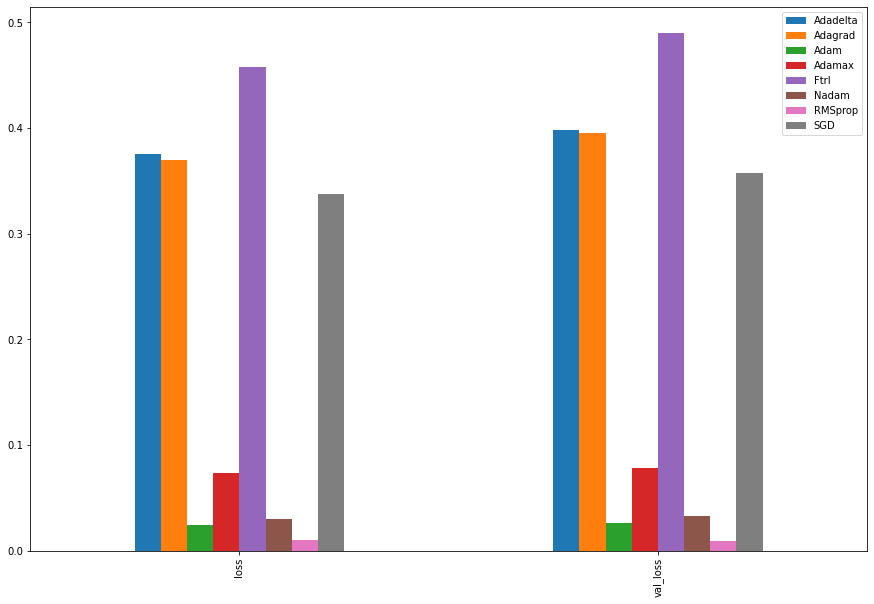

In [236]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

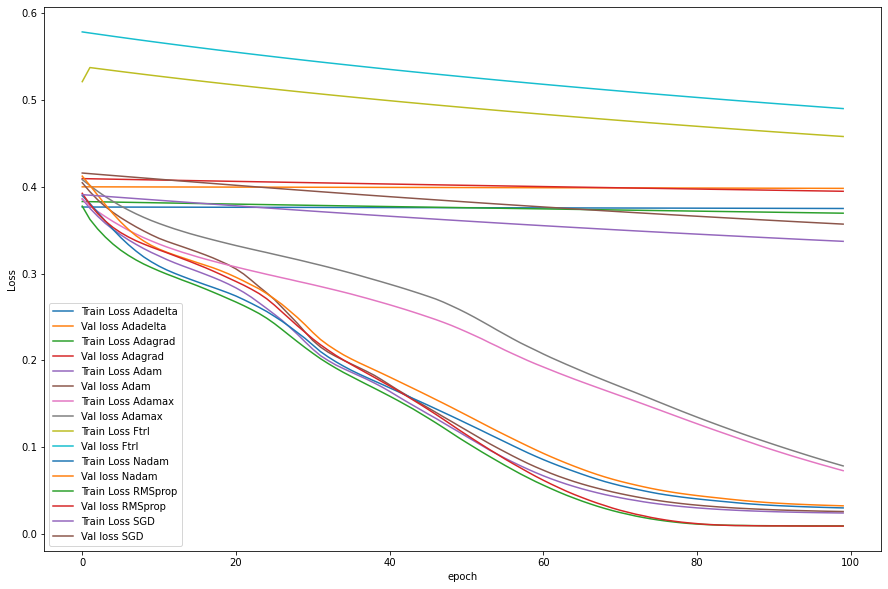

In [237]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [238]:
results

{'Adadelta': {'loss': 0.37503767013549805, 'val_loss': 0.39819538593292236},
 'Adagrad': {'loss': 0.3696138858795166, 'val_loss': 0.394854873418808},
 'Adam': {'loss': 0.024371284991502762, 'val_loss': 0.026082854717969894},
 'Adamax': {'loss': 0.07311588525772095, 'val_loss': 0.07858682423830032},
 'Ftrl': {'loss': 0.45792606472969055, 'val_loss': 0.4900694787502289},
 'Nadam': {'loss': 0.03023127093911171, 'val_loss': 0.032618198543787},
 'RMSprop': {'loss': 0.009515419602394104, 'val_loss': 0.009310855530202389},
 'SGD': {'loss': 0.33720827102661133, 'val_loss': 0.35703545808792114}}

In [239]:
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,))])
    model.compile(loss='mae',optimizer=optimizer,metrics=['mse'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]

Epoch 1/100
9/9 [==============================] - 2s 68ms/step - loss: 0.5772 - mse: 0.3912 - val_loss: 0.6006 - val_mse: 0.4215
Epoch 2/100
9/9 [==============================] - 0s 17ms/step - loss: 0.5772 - mse: 0.3912 - val_loss: 0.6006 - val_mse: 0.4215
Epoch 3/100
9/9 [==============================] - 0s 20ms/step - loss: 0.5772 - mse: 0.3912 - val_loss: 0.6005 - val_mse: 0.4215
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5772 - mse: 0.3912 - val_loss: 0.6005 - val_mse: 0.4215
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5772 - mse: 0.3912 - val_loss: 0.6005 - val_mse: 0.4214
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 0.5771 - mse: 0.3912 - val_loss: 0.6005 - val_mse: 0.4214
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5771 - mse: 0.3911 - val_loss: 0.6005 - val_mse: 0.4214
Epoch 8/100
9/9 [==============================] - 0s 14ms/step - loss: 0.5771 - mse: 0.39

9/9 [==============================] - 0s 8ms/step - loss: 0.5762 - mse: 0.3903 - val_loss: 0.5996 - val_mse: 0.4206
Epoch 64/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5762 - mse: 0.3903 - val_loss: 0.5996 - val_mse: 0.4206
Epoch 65/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5762 - mse: 0.3903 - val_loss: 0.5995 - val_mse: 0.4206
Epoch 66/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5762 - mse: 0.3903 - val_loss: 0.5995 - val_mse: 0.4206
Epoch 67/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5762 - mse: 0.3903 - val_loss: 0.5995 - val_mse: 0.4205
Epoch 68/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5761 - mse: 0.3903 - val_loss: 0.5995 - val_mse: 0.4205
Epoch 69/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5761 - mse: 0.3902 - val_loss: 0.5995 - val_mse: 0.4205
Epoch 70/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5761 - mse: 0.3902 - val_loss

9/9 [==============================] - 0s 8ms/step - loss: 0.5868 - mse: 0.4008 - val_loss: 0.6122 - val_mse: 0.4310
Epoch 27/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5866 - mse: 0.4006 - val_loss: 0.6120 - val_mse: 0.4308
Epoch 28/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5865 - mse: 0.4004 - val_loss: 0.6118 - val_mse: 0.4306
Epoch 29/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5863 - mse: 0.4003 - val_loss: 0.6116 - val_mse: 0.4304
Epoch 30/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5861 - mse: 0.4001 - val_loss: 0.6114 - val_mse: 0.4303
Epoch 31/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5859 - mse: 0.3999 - val_loss: 0.6112 - val_mse: 0.4301
Epoch 32/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5858 - mse: 0.3998 - val_loss: 0.6110 - val_mse: 0.4299
Epoch 33/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5856 - mse: 0.3996 - val_lo

Epoch 89/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5765 - mse: 0.3909 - val_loss: 0.6009 - val_mse: 0.4202
Epoch 90/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5763 - mse: 0.3908 - val_loss: 0.6007 - val_mse: 0.4200
Epoch 91/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5762 - mse: 0.3906 - val_loss: 0.6005 - val_mse: 0.4199
Epoch 92/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5760 - mse: 0.3905 - val_loss: 0.6004 - val_mse: 0.4197
Epoch 93/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5759 - mse: 0.3904 - val_loss: 0.6002 - val_mse: 0.4195
Epoch 94/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5757 - mse: 0.3902 - val_loss: 0.6000 - val_mse: 0.4194
Epoch 95/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5756 - mse: 0.3901 - val_loss: 0.5999 - val_mse: 0.4192
Epoch 96/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5754 - mse: 0.

Epoch 52/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0828 - mse: 0.0317 - val_loss: 0.0800 - val_mse: 0.0330
Epoch 53/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0825 - mse: 0.0317 - val_loss: 0.0801 - val_mse: 0.0330
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0827 - mse: 0.0317 - val_loss: 0.0800 - val_mse: 0.0330
Epoch 55/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0827 - mse: 0.0317 - val_loss: 0.0799 - val_mse: 0.0330
Epoch 56/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0826 - mse: 0.0317 - val_loss: 0.0799 - val_mse: 0.0330
Epoch 57/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0825 - mse: 0.0317 - val_loss: 0.0799 - val_mse: 0.0330
Epoch 58/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0827 - mse: 0.0317 - val_loss: 0.0798 - val_mse: 0.0330
Epoch 59/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0825 - mse: 0.0

Epoch 15/100
9/9 [==============================] - 0s 27ms/step - loss: 0.5110 - mse: 0.3291 - val_loss: 0.5306 - val_mse: 0.3533
Epoch 16/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5079 - mse: 0.3265 - val_loss: 0.5277 - val_mse: 0.3509
Epoch 17/100
9/9 [==============================] - 0s 16ms/step - loss: 0.5050 - mse: 0.3241 - val_loss: 0.5251 - val_mse: 0.3487
Epoch 18/100
9/9 [==============================] - 0s 14ms/step - loss: 0.5025 - mse: 0.3220 - val_loss: 0.5227 - val_mse: 0.3466
Epoch 19/100
9/9 [==============================] - 0s 23ms/step - loss: 0.5001 - mse: 0.3199 - val_loss: 0.5202 - val_mse: 0.3445
Epoch 20/100
9/9 [==============================] - 0s 25ms/step - loss: 0.4978 - mse: 0.3180 - val_loss: 0.5178 - val_mse: 0.3424
Epoch 21/100
9/9 [==============================] - 0s 20ms/step - loss: 0.4956 - mse: 0.3160 - val_loss: 0.5156 - val_mse: 0.3404
Epoch 22/100
9/9 [==============================] - 0s 15ms/step - loss: 0.4935 - m

Epoch 78/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3228 - mse: 0.1540 - val_loss: 0.3314 - val_mse: 0.1635
Epoch 79/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3183 - mse: 0.1503 - val_loss: 0.3264 - val_mse: 0.1595
Epoch 80/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3137 - mse: 0.1468 - val_loss: 0.3214 - val_mse: 0.1556
Epoch 81/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3090 - mse: 0.1432 - val_loss: 0.3165 - val_mse: 0.1519
Epoch 82/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3045 - mse: 0.1398 - val_loss: 0.3114 - val_mse: 0.1481
Epoch 83/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2999 - mse: 0.1364 - val_loss: 0.3064 - val_mse: 0.1445
Epoch 84/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2954 - mse: 0.1332 - val_loss: 0.3016 - val_mse: 0.1409
Epoch 85/100
9/9 [==============================] - 0s 10ms/step - loss: 0.2909 - mse: 

Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7019 - mse: 0.5112 - val_loss: 0.7294 - val_mse: 0.5491
Epoch 42/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7014 - mse: 0.5106 - val_loss: 0.7289 - val_mse: 0.5485
Epoch 43/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7010 - mse: 0.5100 - val_loss: 0.7285 - val_mse: 0.5478
Epoch 44/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7005 - mse: 0.5093 - val_loss: 0.7280 - val_mse: 0.5471
Epoch 45/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7001 - mse: 0.5087 - val_loss: 0.7276 - val_mse: 0.5464
Epoch 46/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6996 - mse: 0.5081 - val_loss: 0.7271 - val_mse: 0.5457
Epoch 47/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6992 - mse: 0.5075 - val_loss: 0.7266 - val_mse: 0.5451
Epoch 48/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6987 - mse: 0.50

Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4608 - mse: 0.2885 - val_loss: 0.4739 - val_mse: 0.3051
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4453 - mse: 0.2759 - val_loss: 0.4573 - val_mse: 0.2905
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.4283 - mse: 0.2604 - val_loss: 0.4376 - val_mse: 0.2719
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 0.4092 - mse: 0.2416 - val_loss: 0.4127 - val_mse: 0.2466
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3868 - mse: 0.2174 - val_loss: 0.3850 - val_mse: 0.2170
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3643 - mse: 0.1939 - val_loss: 0.3591 - val_mse: 0.1924
Epoch 10/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3432 - mse: 0.1749 - val_loss: 0.3374 - val_mse: 0.1743
Epoch 11/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3246 - mse: 0.1601

Epoch 67/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1025 - mse: 0.0455 - val_loss: 0.1011 - val_mse: 0.0481
Epoch 68/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1027 - mse: 0.0455 - val_loss: 0.1005 - val_mse: 0.0481
Epoch 69/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1024 - mse: 0.0455 - val_loss: 0.1003 - val_mse: 0.0480
Epoch 70/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1025 - mse: 0.0455 - val_loss: 0.1003 - val_mse: 0.0480
Epoch 71/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1026 - mse: 0.0455 - val_loss: 0.1003 - val_mse: 0.0480
Epoch 72/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1025 - mse: 0.0455 - val_loss: 0.1002 - val_mse: 0.0480
Epoch 73/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1024 - mse: 0.0455 - val_loss: 0.1002 - val_mse: 0.0481
Epoch 74/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1024 - mse: 0.04

9/9 [==============================] - 0s 9ms/step - loss: 0.4234 - mse: 0.2542 - val_loss: 0.4445 - val_mse: 0.2769
Epoch 31/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4176 - mse: 0.2480 - val_loss: 0.4384 - val_mse: 0.2701
Epoch 32/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4117 - mse: 0.2417 - val_loss: 0.4319 - val_mse: 0.2630
Epoch 33/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4053 - mse: 0.2347 - val_loss: 0.4247 - val_mse: 0.2552
Epoch 34/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3988 - mse: 0.2273 - val_loss: 0.4171 - val_mse: 0.2468
Epoch 35/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3922 - mse: 0.2200 - val_loss: 0.4093 - val_mse: 0.2381
Epoch 36/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3853 - mse: 0.2124 - val_loss: 0.4014 - val_mse: 0.2294
Epoch 37/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3784 - mse: 0.2044 - val_los

Epoch 93/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0816 - mse: 0.0292 - val_loss: 0.0791 - val_mse: 0.0303
Epoch 94/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0811 - mse: 0.0291 - val_loss: 0.0789 - val_mse: 0.0302
Epoch 95/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0805 - mse: 0.0290 - val_loss: 0.0782 - val_mse: 0.0301
Epoch 96/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0803 - mse: 0.0290 - val_loss: 0.0776 - val_mse: 0.0299
Epoch 97/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0798 - mse: 0.0289 - val_loss: 0.0771 - val_mse: 0.0298
Epoch 98/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0799 - mse: 0.0288 - val_loss: 0.0773 - val_mse: 0.0297
Epoch 99/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0792 - mse: 0.0286 - val_loss: 0.0764 - val_mse: 0.0295
Epoch 100/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0791 - mse: 0

Epoch 56/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5570 - mse: 0.3752 - val_loss: 0.5803 - val_mse: 0.4039
Epoch 57/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5565 - mse: 0.3748 - val_loss: 0.5798 - val_mse: 0.4035
Epoch 58/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5561 - mse: 0.3744 - val_loss: 0.5793 - val_mse: 0.4031
Epoch 59/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5556 - mse: 0.3740 - val_loss: 0.5789 - val_mse: 0.4027
Epoch 60/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5552 - mse: 0.3736 - val_loss: 0.5784 - val_mse: 0.4023
Epoch 61/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5547 - mse: 0.3732 - val_loss: 0.5779 - val_mse: 0.4019
Epoch 62/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5543 - mse: 0.3728 - val_loss: 0.5775 - val_mse: 0.4015
Epoch 63/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5538 - mse: 

<AxesSubplot:>

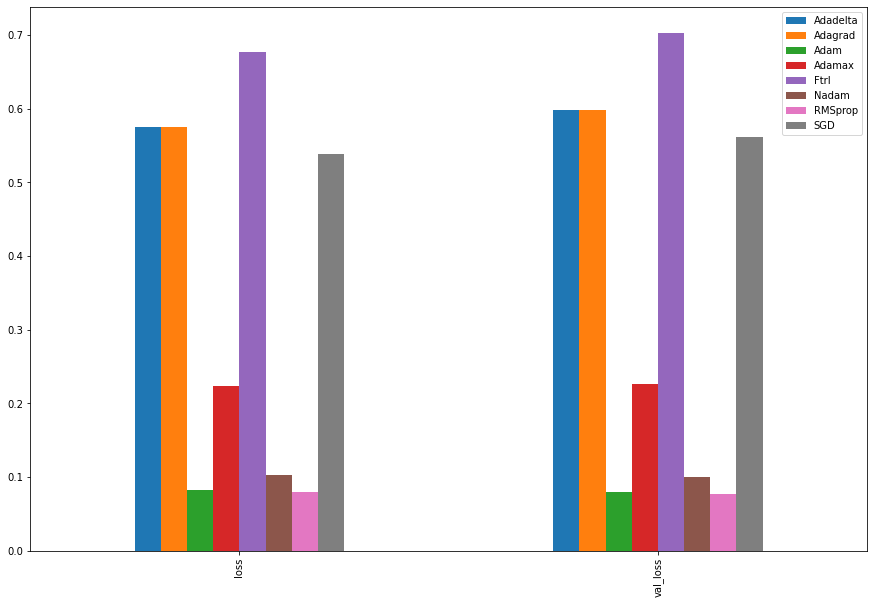

In [240]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

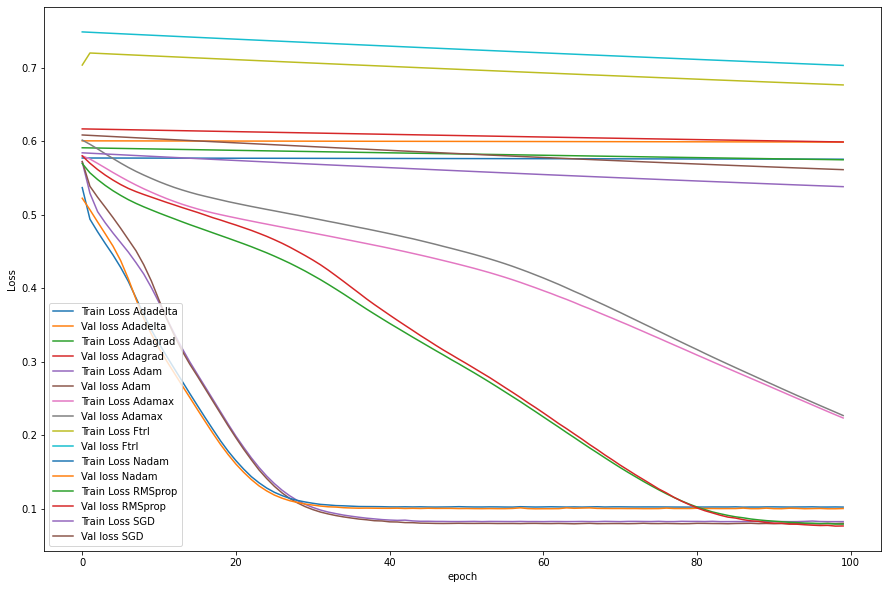

In [241]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [242]:
results

{'Adadelta': {'loss': 0.5755593180656433, 'val_loss': 0.5989111065864563},
 'Adagrad': {'loss': 0.5747868418693542, 'val_loss': 0.5990211963653564},
 'Adam': {'loss': 0.08245448023080826, 'val_loss': 0.08008407056331635},
 'Adamax': {'loss': 0.22346752882003784, 'val_loss': 0.2268017679452896},
 'Ftrl': {'loss': 0.6766397356987, 'val_loss': 0.703208327293396},
 'Nadam': {'loss': 0.10224758088588715, 'val_loss': 0.10027340799570084},
 'RMSprop': {'loss': 0.079079270362854, 'val_loss': 0.07654731720685959},
 'SGD': {'loss': 0.5382232666015625, 'val_loss': 0.5613592267036438}}

In [243]:
#val_loss adam
results1mae = 0.009343213401734829

In [244]:
#val_loss Nadam
results1mse =0.07165121287107

En cuanto al optimizador se seleccionaria el Nadam para mae y adam para mse ya que obtiene mejor desempeño en validación. 
Inicialmente se corre el modelo con 50 epocas y notamos que siguen bajando los valores de mse y mae, se prueba con 100 y visualizamos que la curva se aplana para los mejores optimizadores. 
El mejor desempeño es: results1mse =0.07165121287107 con MSE Y results1mae = 0.009343213401734829 para MAE

De igual manera vemos que no hay overfiftin ya que los valores de loss en training y test son similares. 

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [245]:
# Celda 2
EPOCHS2 = 50
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,)),
    keras.layers.Dense(64, activation=tf.nn.relu)])
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS2,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS2 - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS2 - 1]

Epoch 1/50
9/9 [==============================] - 1s 41ms/step - loss: 0.3958 - mae: 0.5907 - val_loss: 0.4226 - val_mae: 0.6122
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3958 - mae: 0.5906 - val_loss: 0.4225 - val_mae: 0.6121
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3957 - mae: 0.5905 - val_loss: 0.4225 - val_mae: 0.6120
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3956 - mae: 0.5905 - val_loss: 0.4224 - val_mae: 0.6119
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3956 - mae: 0.5904 - val_loss: 0.4223 - val_mae: 0.6119
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3955 - mae: 0.5903 - val_loss: 0.4222 - val_mae: 0.6118
Epoch 7/50
9/9 [==============================] - 0s 26ms/step - loss: 0.3954 - mae: 0.5903 - val_loss: 0.4222 - val_mae: 0.6117
Epoch 8/50
9/9 [==============================] - 0s 25ms/step - loss: 0.3953 - mae: 0.5902 - val_l

9/9 [==============================] - 0s 11ms/step - loss: 0.4162 - mae: 0.6111 - val_loss: 0.4492 - val_mae: 0.6375
Epoch 15/50
9/9 [==============================] - 0s 11ms/step - loss: 0.4156 - mae: 0.6105 - val_loss: 0.4486 - val_mae: 0.6369
Epoch 16/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4150 - mae: 0.6100 - val_loss: 0.4479 - val_mae: 0.6364
Epoch 17/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4144 - mae: 0.6095 - val_loss: 0.4473 - val_mae: 0.6358
Epoch 18/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4139 - mae: 0.6089 - val_loss: 0.4467 - val_mae: 0.6353
Epoch 19/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4133 - mae: 0.6084 - val_loss: 0.4460 - val_mae: 0.6347
Epoch 20/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4127 - mae: 0.6079 - val_loss: 0.4454 - val_mae: 0.6341
Epoch 21/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4121 - mae: 0.6073 - val_loss: 

9/9 [==============================] - 0s 11ms/step - loss: 0.0132 - mae: 0.0633 - val_loss: 0.0140 - val_mae: 0.0646
Epoch 28/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0131 - mae: 0.0635 - val_loss: 0.0141 - val_mae: 0.0657
Epoch 29/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0130 - mae: 0.0628 - val_loss: 0.0139 - val_mae: 0.0637
Epoch 30/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0130 - mae: 0.0619 - val_loss: 0.0138 - val_mae: 0.0630
Epoch 31/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0129 - mae: 0.0620 - val_loss: 0.0140 - val_mae: 0.0646
Epoch 32/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0129 - mae: 0.0615 - val_loss: 0.0137 - val_mae: 0.0626
Epoch 33/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0128 - mae: 0.0612 - val_loss: 0.0137 - val_mae: 0.0631
Epoch 34/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0128 - mae: 0.0612 - val_loss

9/9 [==============================] - 0s 9ms/step - loss: 0.0205 - mae: 0.1151 - val_loss: 0.0212 - val_mae: 0.1162
Epoch 41/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0198 - mae: 0.1133 - val_loss: 0.0205 - val_mae: 0.1141
Epoch 42/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0192 - mae: 0.1115 - val_loss: 0.0198 - val_mae: 0.1119
Epoch 43/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0187 - mae: 0.1098 - val_loss: 0.0191 - val_mae: 0.1100
Epoch 44/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0181 - mae: 0.1081 - val_loss: 0.0185 - val_mae: 0.1082
Epoch 45/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0176 - mae: 0.1066 - val_loss: 0.0179 - val_mae: 0.1062
Epoch 46/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0171 - mae: 0.1050 - val_loss: 0.0173 - val_mae: 0.1044
Epoch 47/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0167 - mae: 0.1037 - val_loss: 0

9/9 [==============================] - 0s 11ms/step - loss: 0.0173 - mae: 0.1035 - val_loss: 0.0135 - val_mae: 0.0924
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0119 - mae: 0.0854 - val_loss: 0.0107 - val_mae: 0.0817
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0094 - mae: 0.0769 - val_loss: 0.0087 - val_mae: 0.0723
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0080 - mae: 0.0700 - val_loss: 0.0080 - val_mae: 0.0693
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0071 - mae: 0.0663 - val_loss: 0.0068 - val_mae: 0.0626
Epoch 8/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0064 - mae: 0.0619 - val_loss: 0.0065 - val_mae: 0.0622
Epoch 9/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0060 - mae: 0.0603 - val_loss: 0.0060 - val_mae: 0.0594
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0057 - mae: 0.0584 - val_loss: 0.00

9/9 [==============================] - 0s 11ms/step - loss: 0.0161 - mae: 0.1012 - val_loss: 0.0153 - val_mae: 0.0982
Epoch 17/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0144 - mae: 0.0952 - val_loss: 0.0144 - val_mae: 0.0954
Epoch 18/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0132 - mae: 0.0913 - val_loss: 0.0129 - val_mae: 0.0909
Epoch 19/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0121 - mae: 0.0868 - val_loss: 0.0120 - val_mae: 0.0867
Epoch 20/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0113 - mae: 0.0841 - val_loss: 0.0114 - val_mae: 0.0858
Epoch 21/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0799 - val_loss: 0.0105 - val_mae: 0.0814
Epoch 22/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0096 - mae: 0.0775 - val_loss: 0.0100 - val_mae: 0.0789
Epoch 23/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0090 - mae: 0.0751 - val_loss

9/9 [==============================] - 0s 11ms/step - loss: 0.3733 - mae: 0.5688 - val_loss: 0.3966 - val_mae: 0.5863
Epoch 30/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3713 - mae: 0.5667 - val_loss: 0.3944 - val_mae: 0.5840
Epoch 31/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3692 - mae: 0.5645 - val_loss: 0.3922 - val_mae: 0.5818
Epoch 32/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3672 - mae: 0.5624 - val_loss: 0.3900 - val_mae: 0.5795
Epoch 33/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3652 - mae: 0.5603 - val_loss: 0.3879 - val_mae: 0.5772
Epoch 34/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3631 - mae: 0.5582 - val_loss: 0.3857 - val_mae: 0.5750
Epoch 35/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3612 - mae: 0.5561 - val_loss: 0.3836 - val_mae: 0.5727
Epoch 36/50
9/9 [==============================] - 0s 22ms/step - loss: 0.3591 - mae: 0.5539 - val_loss:

<AxesSubplot:>

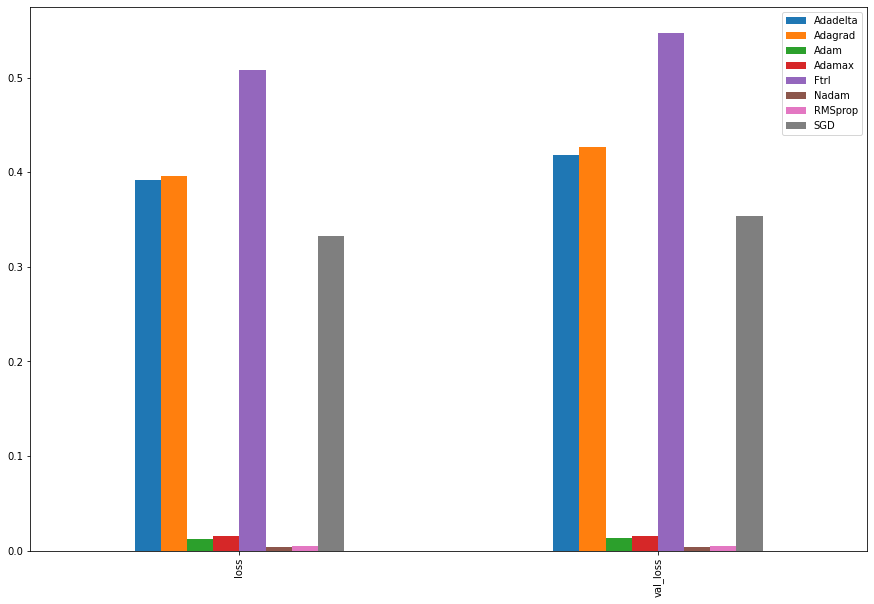

In [246]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

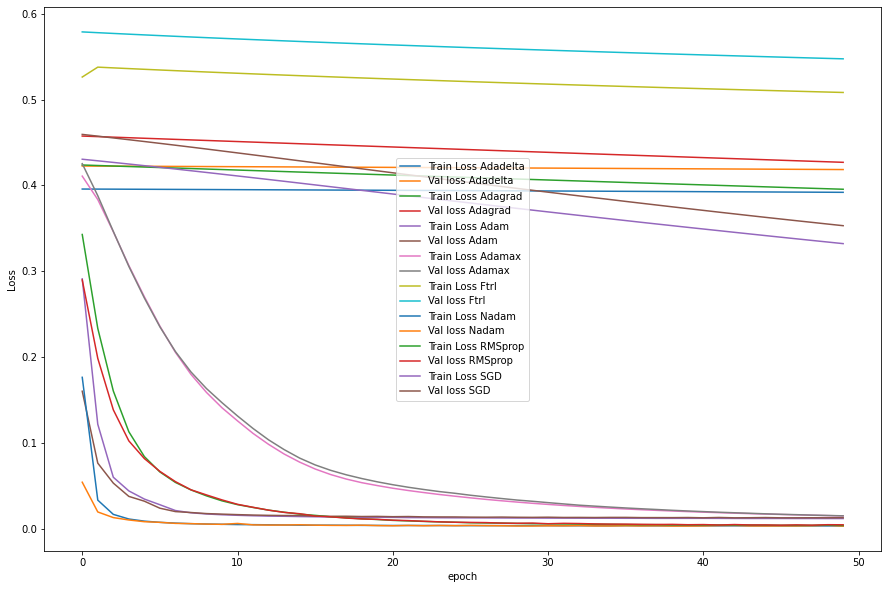

In [247]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [248]:
results

{'Adadelta': {'loss': 0.39201638102531433, 'val_loss': 0.4185127317905426},
 'Adagrad': {'loss': 0.39559826254844666, 'val_loss': 0.4269315302371979},
 'Adam': {'loss': 0.012398209422826767, 'val_loss': 0.013378981500864029},
 'Adamax': {'loss': 0.015451768413186073, 'val_loss': 0.015566622838377953},
 'Ftrl': {'loss': 0.5082097053527832, 'val_loss': 0.5473567843437195},
 'Nadam': {'loss': 0.0038714222609996796, 'val_loss': 0.0036224403884261847},
 'RMSprop': {'loss': 0.004331870004534721, 'val_loss': 0.005123741924762726},
 'SGD': {'loss': 0.3323073387145996, 'val_loss': 0.3531844913959503}}

In [249]:
results2mae=0.004058503080159426

In [250]:
# Celda 2
EPOCHS2 = 50
results = {}
history = {}
for optimizer in optimizers_list:
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(dims,)),
    keras.layers.Dense(64, activation=tf.nn.relu)])
    model.compile(loss='mae',optimizer=optimizer,metrics=['mse'])
    optimizer_key = str(type(optimizer).__name__)
    history[optimizer_key] = model.fit(X_train, Y_train, epochs=EPOCHS2,validation_split=0.2)
    results[optimizer_key] = {}
    results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS2 - 1]
    results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS2 - 1]

Epoch 1/50
9/9 [==============================] - 1s 47ms/step - loss: 0.6252 - mse: 0.4299 - val_loss: 0.6521 - val_mse: 0.4628
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6251 - mse: 0.4299 - val_loss: 0.6520 - val_mse: 0.4627
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6251 - mse: 0.4298 - val_loss: 0.6520 - val_mse: 0.4626
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6250 - mse: 0.4297 - val_loss: 0.6519 - val_mse: 0.4626
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.6249 - mse: 0.4297 - val_loss: 0.6518 - val_mse: 0.4625
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6249 - mse: 0.4296 - val_loss: 0.6518 - val_mse: 0.4624
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6248 - mse: 0.4295 - val_loss: 0.6517 - val_mse: 0.4624
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6248 - mse: 0.4295 - val

9/9 [==============================] - 0s 13ms/step - loss: 0.5876 - mse: 0.3899 - val_loss: 0.6087 - val_mse: 0.4165
Epoch 15/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5869 - mse: 0.3892 - val_loss: 0.6079 - val_mse: 0.4158
Epoch 16/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5862 - mse: 0.3886 - val_loss: 0.6072 - val_mse: 0.4150
Epoch 17/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5855 - mse: 0.3879 - val_loss: 0.6065 - val_mse: 0.4143
Epoch 18/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5849 - mse: 0.3872 - val_loss: 0.6058 - val_mse: 0.4135
Epoch 19/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5842 - mse: 0.3865 - val_loss: 0.6050 - val_mse: 0.4128
Epoch 20/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5835 - mse: 0.3858 - val_loss: 0.6043 - val_mse: 0.4120
Epoch 21/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5828 - mse: 0.3851 - val_loss: 

9/9 [==============================] - 0s 8ms/step - loss: 0.0450 - mse: 0.0041 - val_loss: 0.0444 - val_mse: 0.0036
Epoch 28/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0445 - mse: 0.0040 - val_loss: 0.0430 - val_mse: 0.0034
Epoch 29/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0439 - mse: 0.0041 - val_loss: 0.0442 - val_mse: 0.0036
Epoch 30/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0444 - mse: 0.0040 - val_loss: 0.0450 - val_mse: 0.0036
Epoch 31/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0451 - mse: 0.0042 - val_loss: 0.0448 - val_mse: 0.0036
Epoch 32/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0446 - mse: 0.0040 - val_loss: 0.0437 - val_mse: 0.0035
Epoch 33/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0437 - mse: 0.0040 - val_loss: 0.0447 - val_mse: 0.0036
Epoch 34/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0428 - mse: 0.0039 - val_loss: 0.

9/9 [==============================] - 0s 12ms/step - loss: 0.0965 - mse: 0.0211 - val_loss: 0.0988 - val_mse: 0.0219
Epoch 41/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0951 - mse: 0.0207 - val_loss: 0.0974 - val_mse: 0.0216
Epoch 42/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0936 - mse: 0.0203 - val_loss: 0.0958 - val_mse: 0.0212
Epoch 43/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0924 - mse: 0.0200 - val_loss: 0.0944 - val_mse: 0.0208
Epoch 44/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0910 - mse: 0.0197 - val_loss: 0.0930 - val_mse: 0.0204
Epoch 45/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0899 - mse: 0.0193 - val_loss: 0.0919 - val_mse: 0.0201
Epoch 46/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0887 - mse: 0.0190 - val_loss: 0.0907 - val_mse: 0.0198
Epoch 47/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0876 - mse: 0.0188 - val_loss: 

9/9 [==============================] - 0s 10ms/step - loss: 0.1118 - mse: 0.0259 - val_loss: 0.0927 - val_mse: 0.0202
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0913 - mse: 0.0198 - val_loss: 0.0861 - val_mse: 0.0180
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0847 - mse: 0.0180 - val_loss: 0.0770 - val_mse: 0.0163
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0766 - mse: 0.0160 - val_loss: 0.0688 - val_mse: 0.0147
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0716 - mse: 0.0151 - val_loss: 0.0696 - val_mse: 0.0147
Epoch 8/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0706 - mse: 0.0149 - val_loss: 0.0645 - val_mse: 0.0140
Epoch 9/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0679 - mse: 0.0145 - val_loss: 0.0644 - val_mse: 0.0139
Epoch 10/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0673 - mse: 0.0141 - val_loss: 0.0

9/9 [==============================] - 0s 11ms/step - loss: 0.0950 - mse: 0.0154 - val_loss: 0.0921 - val_mse: 0.0139
Epoch 17/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0907 - mse: 0.0139 - val_loss: 0.0874 - val_mse: 0.0127
Epoch 18/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0858 - mse: 0.0127 - val_loss: 0.0839 - val_mse: 0.0117
Epoch 19/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0821 - mse: 0.0116 - val_loss: 0.0807 - val_mse: 0.0109
Epoch 20/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0796 - mse: 0.0111 - val_loss: 0.0756 - val_mse: 0.0098
Epoch 21/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0760 - mse: 0.0101 - val_loss: 0.0741 - val_mse: 0.0093
Epoch 22/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0737 - mse: 0.0095 - val_loss: 0.0729 - val_mse: 0.0088
Epoch 23/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0720 - mse: 0.0092 - val_loss

9/9 [==============================] - 0s 9ms/step - loss: 0.5481 - mse: 0.3544 - val_loss: 0.5672 - val_mse: 0.3776
Epoch 30/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5458 - mse: 0.3523 - val_loss: 0.5646 - val_mse: 0.3752
Epoch 31/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5434 - mse: 0.3501 - val_loss: 0.5620 - val_mse: 0.3728
Epoch 32/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5410 - mse: 0.3480 - val_loss: 0.5595 - val_mse: 0.3704
Epoch 33/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5387 - mse: 0.3458 - val_loss: 0.5569 - val_mse: 0.3681
Epoch 34/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5363 - mse: 0.3437 - val_loss: 0.5543 - val_mse: 0.3658
Epoch 35/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5339 - mse: 0.3416 - val_loss: 0.5517 - val_mse: 0.3635
Epoch 36/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5316 - mse: 0.3395 - val_loss: 

<AxesSubplot:>

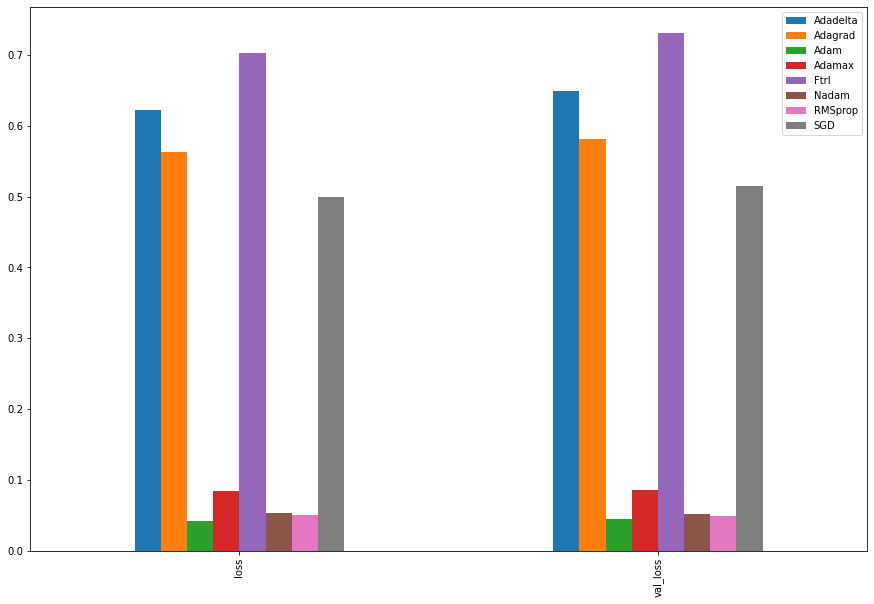

In [251]:
import matplotlib.pyplot as plt
import pandas as pd
df_results = pd.DataFrame(results)
df_results.plot.bar(figsize=(15, 10))

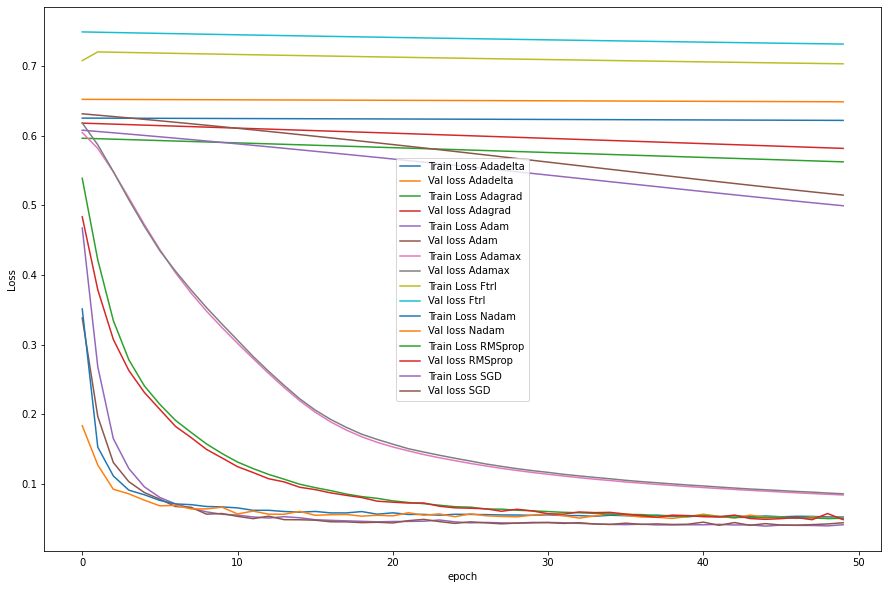

In [252]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()

In [253]:
results

{'Adadelta': {'loss': 0.621912956237793, 'val_loss': 0.6486005187034607},
 'Adagrad': {'loss': 0.5624293684959412, 'val_loss': 0.5817369222640991},
 'Adam': {'loss': 0.04173090681433678, 'val_loss': 0.04459414258599281},
 'Adamax': {'loss': 0.08442143350839615, 'val_loss': 0.0861414298415184},
 'Ftrl': {'loss': 0.7031024098396301, 'val_loss': 0.7314303517341614},
 'Nadam': {'loss': 0.05277945473790169, 'val_loss': 0.05135798454284668},
 'RMSprop': {'loss': 0.05091122165322304, 'val_loss': 0.04899619519710541},
 'SGD': {'loss': 0.49945205450057983, 'val_loss': 0.5147015452384949}}

In [254]:
results2mse=0.0536031574010849

En cuanto al optimizador se seleccionaria el nadam para mae y adam para mse ya que obtiene mejor desempeño en validación. 
Inicialmente se corre el modelo con 50 epocas y funciona bien, principalmente con la metrica mse en cual se logra estabilidad para el optimizador seleccionado. 

El mejor desempeño es: results2mse=0.0536031574010849 para MSE y results2mae=0.004058503080159426 para MAE

De igual manera vemos que no hay overfiftin ya que los valores de loss en training y test son similares. 

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [255]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = keras.Sequential([
keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(dims,)), tf.keras.layers.Dropout(0.3),
keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dropout(0.3)])
model.compile(tf.keras.optimizers.Nadam(), loss='mae', metrics=['mse'] )
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
callbacks2 = [keras.callbacks.ModelCheckpoint('best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)]
model.fit(X_train, Y_train,
                    epochs=EPOCHS2, batch_size=1, callbacks=[callback,callbacks2],
                    verbose=0)
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: loss improved from inf to 0.48044, saving model to best_model.h5

Epoch 2: loss improved from 0.48044 to 0.35340, saving model to best_model.h5

Epoch 3: loss improved from 0.35340 to 0.32029, saving model to best_model.h5

Epoch 4: loss improved from 0.32029 to 0.30524, saving model to best_model.h5

Epoch 5: loss improved from 0.30524 to 0.29427, saving model to best_model.h5

Epoch 6: loss improved from 0.29427 to 0.28837, saving model to best_model.h5

Epoch 7: loss improved from 0.28837 to 0.27685, saving model to best_model.h5

Epoch 8: loss improved from 0.27685 to 0.27433, saving model to best_model.h5

Epoch 9: loss improved from 0.27433 to 0.27321, saving model to best_model.h5

Epoch 10: loss improved from 0.27321 to 0.26529, saving model to best_model.h5

Epoch 11: loss did not improve from 0.26529

Epoch 12: loss improved from 0.26529 to 0.25953, saving model to best_model.h5

Epoch 13: loss improved from 0.25953 to 0.25527, saving model to best_model.h5

Epoch 1

In [256]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = keras.Sequential([
keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(dims,)), tf.keras.layers.Dropout(0.3),
keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dropout(0.3)])
model.compile(tf.keras.optimizers.Nadam(), loss='mae', metrics=['mse'] )
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
callbacks2 = [keras.callbacks.ModelCheckpoint('best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)]
model.fit(X_train, Y_train,
                    epochs=EPOCHS2, batch_size=1, callbacks=[callback,callbacks2],
                    verbose=0)
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
_, test_mae3 = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: loss improved from inf to 0.48854, saving model to best_model.h5

Epoch 2: loss improved from 0.48854 to 0.35623, saving model to best_model.h5

Epoch 3: loss improved from 0.35623 to 0.31668, saving model to best_model.h5

Epoch 4: loss improved from 0.31668 to 0.30421, saving model to best_model.h5

Epoch 5: loss improved from 0.30421 to 0.28970, saving model to best_model.h5

Epoch 6: loss improved from 0.28970 to 0.28778, saving model to best_model.h5

Epoch 7: loss improved from 0.28778 to 0.27735, saving model to best_model.h5

Epoch 8: loss improved from 0.27735 to 0.27411, saving model to best_model.h5

Epoch 9: loss improved from 0.27411 to 0.26993, saving model to best_model.h5

Epoch 10: loss improved from 0.26993 to 0.26933, saving model to best_model.h5

Epoch 11: loss improved from 0.26933 to 0.26681, saving model to best_model.h5

Epoch 12: loss improved from 0.26681 to 0.26340, saving model to best_model.h5

Epoch 13: loss did not improve from 0.26340

Epoch 1

In [257]:


# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = keras.Sequential([
keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(dims,)), tf.keras.layers.Dropout(0.3),
keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dropout(0.3)])
model.compile(tf.keras.optimizers.Nadam(), loss='mse', metrics=['mae'] )
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)
callbacks2 = [keras.callbacks.ModelCheckpoint('best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)]
model.fit(X_train, Y_train,
                    epochs=EPOCHS2, batch_size=1, callbacks=[callback,callbacks2],
                    verbose=0)
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, Y_train, verbose=0)
_, test_mse3 = saved_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: loss improved from inf to 0.29865, saving model to best_model.h5

Epoch 2: loss improved from 0.29865 to 0.20486, saving model to best_model.h5

Epoch 3: loss improved from 0.20486 to 0.19065, saving model to best_model.h5

Epoch 4: loss improved from 0.19065 to 0.18141, saving model to best_model.h5

Epoch 5: loss did not improve from 0.18141

Epoch 6: loss improved from 0.18141 to 0.17611, saving model to best_model.h5

Epoch 7: loss improved from 0.17611 to 0.17426, saving model to best_model.h5

Epoch 8: loss did not improve from 0.17426

Epoch 9: loss improved from 0.17426 to 0.17084, saving model to best_model.h5

Epoch 10: loss improved from 0.17084 to 0.16759, saving model to best_model.h5

Epoch 11: loss improved from 0.16759 to 0.16754, saving model to best_model.h5

Epoch 12: loss did not improve from 0.16754

Epoch 13: loss did not improve from 0.16754

Epoch 14: loss improved from 0.16754 to 0.16618, saving model to best_model.h5

Epoch 15: loss did not improve f

De acuerdo al punto anterior, se usa el optimizador Nadam ya que fue el de mejor desempeño para el modelo multicapa, se incluye dropout igual a 0.3 ya que es el que recomiendo la literatura consultada, en cuanto al early stoping se usa una patience de 3 en el cual se espera que la funcion de perdida mejore o que se detenga. Encontramos que para el loss = mae se detiene en la epoca 24, logrando en test un desempeño de 0.052. Cuando se usa la funcion de perdida mse se detiene en la epoca 13 con un resultado de 0.218.

## Punto 4 - Comparación y análisis de resultados
En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

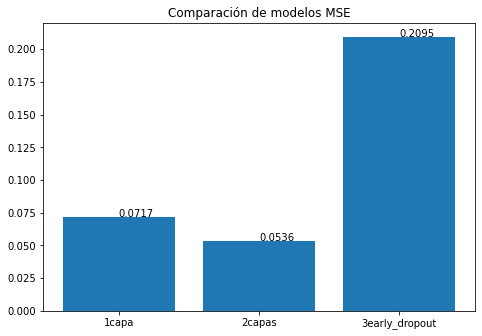

In [258]:
# Celda 4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MSE")
ejeX = ['1capa','2capas', '3early_dropout']
ejeY = [results1mse,results2mse,test_mse3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i], 4),round(y[i], 4))
addlabels(ejeX,ejeY,plt)
plt.show()

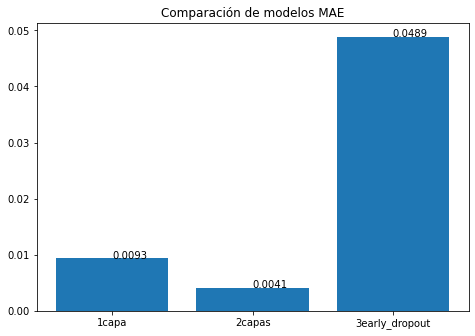

In [259]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos MAE")
ejeX = ['1capa','2capas', '3early_dropout']
ejeY = [results1mae,results2mae,test_mae3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i], 4),round(y[i], 4))
addlabels(ejeX,ejeY,plt)
plt.show()

En conclusión el mejor modelo es aquel que tiene dos capas ocultas y no tiene Early stoping o dropout, el optimizador con mejor desempeño es NADAM para MAE y ADAM con la métrica MSE. Este modelo tiene resultados estables en un numero de epocas pequeño (20 - 30 ) lo cual lo hace eficiente. 
El peor modelo fue con earlystoping ya que la salida se da antes de que converja hacia los minimos valores de MAE y MSE. Consideramos que el Droupout = 0.3 no es indicado para estos datos, Se podria ejecutar un grid search para calibrar este metodo/parametro. Tambien podria dejarse un patience mas alto para no salga tan rápido. 